# Исследование рынка компьютерных игр

## Цели исследования
Целью данного исследования является выявление факторов и закономерностей, влияющих на рынок компьютерных игр. Исследование проводится на основе данных из открытых источников c 1977 по 2016 года включительно.  
Результаты, полученные в ходе работы будут использованы для планирования кампании по продаже игр на 2017-й год.

## План выполнения работы:
 1. Изучение общей информации;
 2. Подготовка данных (предобработка и добавление необходимых расчетных данных);
 3. Анализ данных;
 4. Составление портрета пользователя для каждого из регионов;
 5. Проверка гипотез
 6. Формулирование выводов.

## Шаг 1. Изучение общей информации о файле

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.display import display

In [2]:
games_data = pd.read_csv('datasets/games.csv')

display(games_data.info())
display(games_data.describe())
display(games_data.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Вывод

Data frame состоит из 11 столбцов, включает 16715 строк информации.   

В данных присутствуют следующие столбцы:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы долларов)  
EU_sales — продажи в Европе (миллионы долларов)  
JP_sales — продажи в Японии (миллионы долларов)  
Other_sales — продажи в других странах (миллионы долларов)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  


Уже при поверхностном анализе видно, что в данных присутствует ряд проблем:
- Названия столбцов не приведены к нижнему регистру; 
- Пропуски данных в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating;
- Неправильные типы данных в ряде столбцов (Year_of_Release, User_Score).

Далее избавимся от этих проблем (там, где это возможно и целесообразно).

## Шаг 2. Подготовка данных

### Переиминование столбцов

Приведем названия столбцов к нижнему регистру

In [3]:
games_data.columns = map(str.lower, games_data.columns)
print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Обработка пропусков

#### Поле name:

In [4]:
# Изучим строки, в которых не заполнено поле name
display(games_data[games_data['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно, поле `name` не заполнено всего в двух строках, причем для данных строк не заполнены также другие ключевые показатели (жанр, оценки критиков и пользователей, рейтинг). Эти 2 строчки можно удалить без ущерба для будущих результатов.

In [5]:
games_data.dropna(subset=['name'], inplace=True)

#### Поле year_of_release:

In [6]:
# Изучим строки, в которых не заполнено поле year_of_release
print('Всего строк, где не заполнено поле year_of_release:',  \
      games_data[games_data['year_of_release'].isnull()].count()['name'])
display(games_data[games_data['year_of_release'].isnull()].head(10))

Всего строк, где не заполнено поле year_of_release: 269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Как видно, у части игр год выхода указан в названии.  
Для всех строк, где не указан `year_of_release`, проверим есть ли в `name` указание на год выхода игры. Если такое указание в названии есть, скопируем его в `year_of_release`.

In [7]:
def fill_year_from_name(row):
    """
    Функция ищет в названии игры год релиза и, если находит, то возвращает его.
    """
    year = re.search(r'\d{4}', row['name'])
    if year is not None:
        return year.group()

# Там где, год указан в названии игры, заполним его
games_data.loc[games_data['year_of_release'].isnull(), 'year_of_release'] = \
games_data.apply(fill_year_from_name, axis=1)

# Проверим результаты
print('Всего строк, где не заполнено поле year_of_release:',  \
      games_data[games_data['year_of_release'].isnull()].count()['name'])

Всего строк, где не заполнено поле year_of_release: 252


С помощью названия игры удалось заполнить всего 17 пропусков. Оставшиеся строки, где не заполнен год релиза, составляют всего 1.5% от общего числа записей в датафрейме. Соответственно, их можно удалить. Однако, чтобы при этом не потерять информацию о какой-нибудь важной игре, не будем удалять записи, где суммарные мировые продажи составили более 1 млн. долларов.

In [8]:
# Удалим записи, где одновременно не указан год релиза и суммарные мировые продажи не превысили 1 млн. долларов
row_indexes = games_data[games_data['year_of_release'].isnull()]\
.query('(na_sales+eu_sales+jp_sales+other_sales) < 1').index
games_data.drop(row_indexes , inplace=True)

# Проверим результаты
print('Всего строк, где не заполнено поле year_of_release:',  \
      games_data[games_data['year_of_release'].isnull()].count()['name'])
display(games_data[games_data['year_of_release'].isnull()])

Всего строк, где не заполнено поле year_of_release: 18


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,None,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,None,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,Rock Band,X360,None,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,None,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,None,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,None,Shooter,1.17,0.84,0.0,0.23,69.0,6.7,T
805,Rock Band,Wii,None,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1131,Call of Duty: Black Ops,PC,None,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M
1142,Rock Band,PS3,None,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1301,Triple Play 99,PS,None,Sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN


Поскольку игр с незаполненным годом релиза теперь всего 18, для каждой из них можно проверить год релиза в открытых источниках (например на ресурсе "Wikipedia") и вручную добавить в датафрейм. 

In [9]:
# Составим список с индексом записи и годом релиза игры (информация взята со страниц игр в Wikipedia)
missing_release_years = [
    [456, 2007],
    [609, 1980],
    [627, 2007],
    [657, 2001],
    [678, 2008],
    [719, 2006],
    [805, 2008],
    [1131, 2010],
    [1142, 2007],
    [1301, 1998],
    [1506, 1980],
    [1538, 2008],
    [1585, 1977],
    [1609, 2011],
    [1699, 2002],
    [1840, 2007],
    [1984, 1999],
    [2010, 1997]
]

# Заполним год релиза для указанных индексов
for game in missing_release_years:
    games_data.loc[game[0], 'year_of_release'] = game[1]
    
# Проверим результаты
print('Всего строк, где не заполнено поле year_of_release:',  \
      games_data[games_data['year_of_release'].isnull()]['name'].count())

Всего строк, где не заполнено поле year_of_release: 0


#### Поля critic_score и user_score:

In [10]:
print('Количество записей, где не заполнено поле critic_score:', \
      games_data[games_data['critic_score'].isnull()]['name'].count())

print('Количество записей, где не заполнено поле user_score:', \
      games_data[(games_data['user_score'].isnull()) | (games_data['user_score'] == "tbd")]['name'].count())

Количество записей, где не заполнено поле critic_score: 8471
Количество записей, где не заполнено поле user_score: 8994


В колонке `user_score` встречается значение "tbd". Скорее всего это абревеатура "to be defined". Изучим такие записи.

In [11]:
display(games_data.query('user_score == "tbd"').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2001,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Судя по всему, значения "tbd" просто указывают на незаполненность данного значения и соответственно могут быть заменены на NaN (чтобы вся колонка имела числовой тип).

In [12]:
# Заменим "tbd" на NaN
games_data['user_score'].replace('tbd', np.NaN, inplace=True)

# Приведем user_score к числовому типу
games_data['user_score'] = pd.to_numeric(games_data['user_score'])

# Проверим результаты
print('Количество записей, где не заполнено поле user_score:', \
      games_data[games_data['user_score'].isnull()]['name'].count())

Количество записей, где не заполнено поле user_score: 8994


Поскольку в датафрейме приведены данные по разным платформам, возможна ситуация, когда оценка заполнена для одной платформы, но не заполнена для другой. В таком случае, мы можем заполнить пропущенное значение из имеющегося.

In [13]:
def fill_value_from_other_platform(row, column_name):
    """
    Функция для поиска определенных значений этой же игры, но на других платформах
    """
    name = row['name']
    year = row['year_of_release']
    score = games_data.query('name == @name and year_of_release == @year')[column_name].mean()
    return score

# Для каждой игры, где пропущен critic_score, попробуем заполнить пропуски 
# данными для этой же игры, но на других платформах
games_data.loc[games_data['critic_score'].isnull(), 'critic_score'] = games_data[games_data['critic_score'].isnull()]\
.apply(fill_value_from_other_platform, column_name = 'critic_score', axis=1)

# Для каждой игры, где пропущен user_score, попробуем заполнить пропуски 
# данными для этой же игры, но на других платформах
games_data.loc[games_data['user_score'].isnull(), 'user_score'] = games_data[games_data['user_score'].isnull()]\
.apply(fill_value_from_other_platform, column_name = 'user_score', axis=1)

# Проверим результаты
print('Количество записей, где не заполнено поле critic_score:', \
      games_data[games_data['critic_score'].isnull()]['name'].count())
print('Количество записей, где не заполнено поле user_score:', \
      games_data[games_data['user_score'].isnull()]['name'].count())

Количество записей, где не заполнено поле critic_score: 7771
Количество записей, где не заполнено поле user_score: 8200


Нам удалось заполнить 794 пропуска для `user_score` и 700 пропусков для `critic_score`.

#### Поле rating:
Попробуем уменьшить количество пропусков в столбце `rating` по тому же принципу, который использовался для полей `critic_score` и `user_score`.

In [14]:
print('Количество записей, где не заполнено поле rating до применения функции:', \
      games_data[games_data['rating'].isnull()]['name'].count())

# Изменим функцию для заполнения пропущенных значений данными для этой же игры, но на других платформах,
# чтобы она работала с полем 'rating'. Было решено использовать отдельную функцию, чтобы не слишком усложнять 
# имеющуюся fill_value_from_other_platform
def fill_rating_from_other_platform(row):
    """
    Функция для поиска значений рейтинга для этой же игры, но на других платформах
    """
    name = row['name']
    year = row['year_of_release']
    rating = games_data.query('name == @name and year_of_release == @year')['rating'].mode()
    if len(rating) > 0:
        return rating[0]
    else: return rating

games_data.loc[games_data['rating'].isnull(), 'rating'] = games_data[games_data['rating'].isnull()]\
.apply(fill_rating_from_other_platform, axis=1)

print('Количество записей, где не заполнено поле rating после применения функции:', \
      games_data[games_data['rating'].isnull()]['name'].count())


Количество записей, где не заполнено поле rating до применения функции: 6687
Количество записей, где не заполнено поле rating после применения функции: 6687


Как видно, количество пропусков в поле rating не изменилось, что говорит о том, что если рейтинг игры не указан для одной платформы, то и для других платформ он также не указан.

### Вывод
Мы полностью избавились от пропусков в наиболее важных полях: название игры и год релиза.
Также по возможности уменьшили количество пропусков в оценках критиков и оценках пользователей.

### Приведение данных к нужным типам

Изначально в датафрейме присутствовали данные, тип которых необходимо было изменить:
- `year_of_release`: заменить на int;
- `user_score`: заменить на float64

Тип данных `user_score` был изменен в предыдущем разделе в процессе избавления от "tbd" и заполнения пропусков.  
Таким образом осталось изменить тип данных в `year_of_release`.

In [15]:
# Приведем year_of_release к типу int
games_data['year_of_release'] = games_data['year_of_release'].astype(int)
# Проверим результаты
print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16479 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16479 non-null  object 
 1   platform         16479 non-null  object 
 2   year_of_release  16479 non-null  int64  
 3   genre            16479 non-null  object 
 4   na_sales         16479 non-null  float64
 5   eu_sales         16479 non-null  float64
 6   jp_sales         16479 non-null  float64
 7   other_sales      16479 non-null  float64
 8   critic_score     8708 non-null   float64
 9   user_score       8279 non-null   float64
 10  rating           9792 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB
None


### Вывод
Все данные имеют нужный тип.  

## Шаг 2. Исследовательский анализ данных

### Количество выпускаемых игр по годам

В данном разделе посмотрим, сколько игр выпускалось в разные годы. В связи с тем, что многие игры выпускались одновременно для нескольких платформ, а количество платформ в разные годы было разным, было принято решение подсчитывать уникальные названия игр. То есть, если игра в один год выходила одновременно для разных платформ, будем учитывать ее только один раз.

,name
year_of_release,
1977,1
1980,11
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


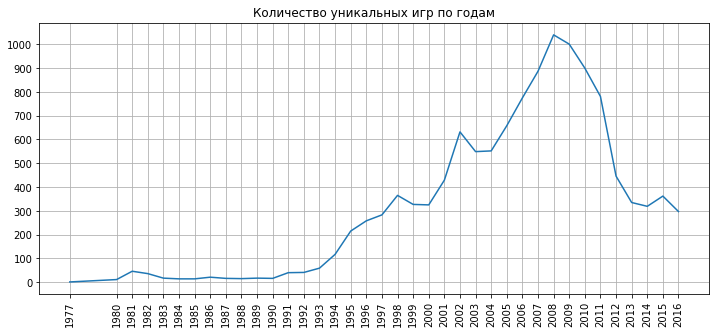

In [16]:
# Построим таблицу и график количества выпускаемых игр по годам
games_by_year = games_data.groupby('year_of_release').agg({"name": "nunique"})
display(games_by_year)

plt.figure(figsize = (12 ,5))
plt.plot(games_by_year['name'])
plt.yticks(np.arange(0, 1100, step=100))
plt.xticks(games_data['year_of_release'].unique(), rotation = 90)
plt.title('Количество уникальных игр по годам')
plt.grid()
plt.show()

### Вывод
Как видно из графика, индустрия компьютерных игр стремительно развивалась до 2008 года, когда количество вышедших компьютерных игр составило 1040. Однако, после 2008 года количество выпускаемых игр стало уменьшаться. Скорее всего это связано с развитием рынка игр для смартфонов: в 2007 году компания Apple выпустила айфон первого поколения, а в 2008 году запустила App Store. Возможно, экономический кризис 2008 года также негативно повлиял на объем рынка компьютерных игр.   

Отталкиваясь от распределения количества выпускаемых игр, при составлении прогноза на 2017 год, в качестве актуального периода видится целесообразным использовать период с 2013 по 2016 годы. В данный период не наблюдается настолько резких изменений, как это было с 2008 по 2013. В кривой количества произведенных игр даже наблюдается некое подобие плато, что повышает вероятность того, что прогноз, сделанный на основе данного анализа, окажется близок к реальности.

Однако при выборе периода для анализ также стоит учесть распределение продаж по платформам, что будет сделано в следующем пункте.

### Продажи по платформам

          total_sales
platform             
PCFX             0.03
GG               0.04
3DO              0.10
TG16             0.16
WS               1.42
NG               1.44
SCD              1.86
DC              15.95
GEN             28.35
SAT             33.59
PSV             53.81
WiiU            82.19
2600            91.56
XOne           159.32
GC             197.03
SNES           200.04
N64            218.01
NES            251.05
XB             253.85
GB             255.46
PC             257.73
3DS            257.81
PSP            291.62
PS4            314.14
GBA            315.28
PS             730.09
DS             802.79
Wii            902.13
PS3            932.96
X360           963.77
PS2           1248.40


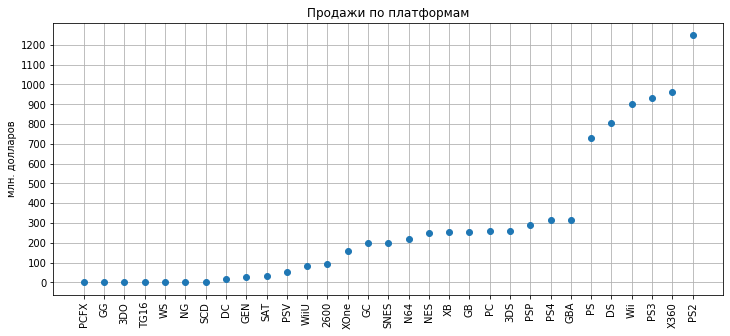

In [17]:
# Добавим колонку с суммарными мировыми продажами
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Сгруппируем суммарные продажи по платформам
total_sales_by_platform = games_data.groupby('platform').agg({"total_sales": "sum"})
print(total_sales_by_platform.sort_values(by='total_sales'))

# Отобразим график суммарных продаж по платформам. 
# Точки графика отобразим отдельно друг от друга, так как продажи для разных платформах не являются
# непрерывным процессом, как продажи по годам
plt.figure(figsize = (12 ,5))
plt.plot(total_sales_by_platform['total_sales'].sort_values(), 'o')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 1300, step=100))
plt.title('Продажи по платформам')
plt.ylabel('млн. долларов')
plt.grid()
plt.show()

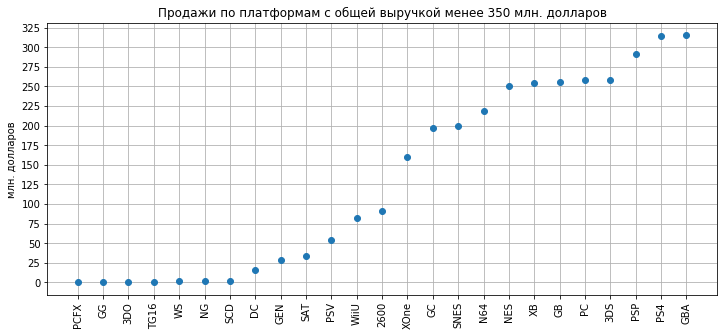

In [18]:
# Рассмотрим более подробно участок графика, где отображены платформы с суммарными продажами не более 350 млн. 
plt.figure(figsize = (12 ,5))
plt.plot(total_sales_by_platform.query('total_sales < 350')['total_sales'].sort_values(), 'o')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 350, step=25))
plt.title('Продажи по платформам с общей выручкой менее 350 млн. долларов')
plt.ylabel('млн. долларов')
plt.grid()
plt.show()

Как видно из таблицы и графиков, по суммарным продажам, платформы можно условно разделить на следующие части:
- менее 2 млн. долларов.
- от 15 до 100 млн. долларов;
- от 150 до 320 млн. долларов;
- от 730 млн. долларов и выше.

Построим распределение продаж по годам для платформ с наибольшими продажами (от 730 млн. долларов и выше).

In [19]:
# Выберем платформы, где продажи составили 730 млн. долларов и выше
top_platforms = total_sales_by_platform.query('total_sales > 730').sort_values(by='total_sales', ascending=False).index
print('Top platforms:', top_platforms)

# Сгруппируем суммарные продажи по платформе и году
sales_by_platform_and_year = games_data.groupby(['platform', 'year_of_release'], as_index=False)\
.agg({'total_sales': 'sum'})
display(sales_by_platform_and_year.query('platform in @top_platforms').head())


Top platforms: Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')


,platform,year_of_release,total_sales
26,DS,1985,0.02
27,DS,2004,17.27
28,DS,2005,130.14
29,DS,2006,119.81
30,DS,2007,146.94


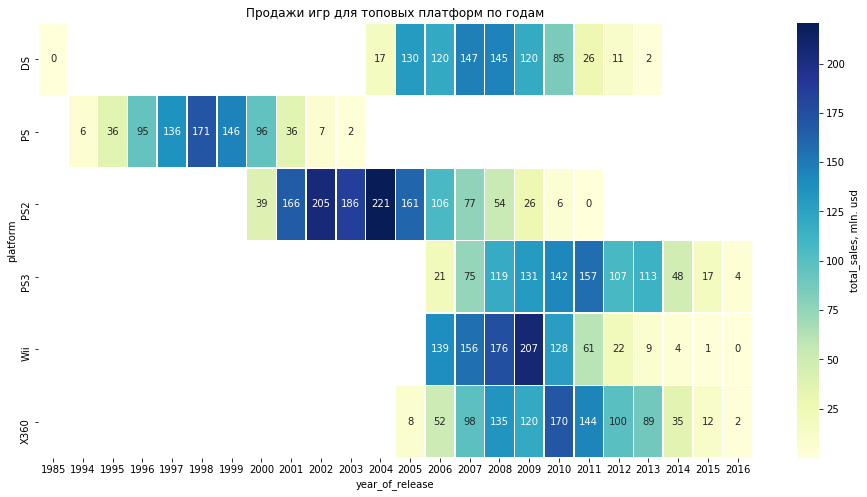

In [20]:
# Построим heatmap продаж игр для топовых платформ по годам
top_platforms_pivot = sales_by_platform_and_year.query('platform in @top_platforms')\
    .pivot("platform", "year_of_release", "total_sales")

def heatmap_platform_sales_by_year(heat_pivot, title):
    fig = plt.figure(figsize = (16, 8))
    ax = sns.heatmap(heat_pivot, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5, \
                     cbar_kws={'label': 'total_sales, mln. usd'})
    ax.set_title(title)

heatmap_platform_sales_by_year(top_platforms_pivot, title = 'Продажи игр для топовых платформ по годам')

График для платформы "DS" содержит странный артефакт в 1985 году. Учитывая, что платформа DS была представлена только в 2004 году, данные за 1985 год явно ошибочны. Проверим их. 

In [21]:
display(games_data.query('platform == "DS" and year_of_release == 1985'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Согласно информации с сайта global.rakuten.com, игра Strongest Tokyo University Shogi вышла на платформе DS в мае 2007 года. Исправим данную ошибку и построим график снова.

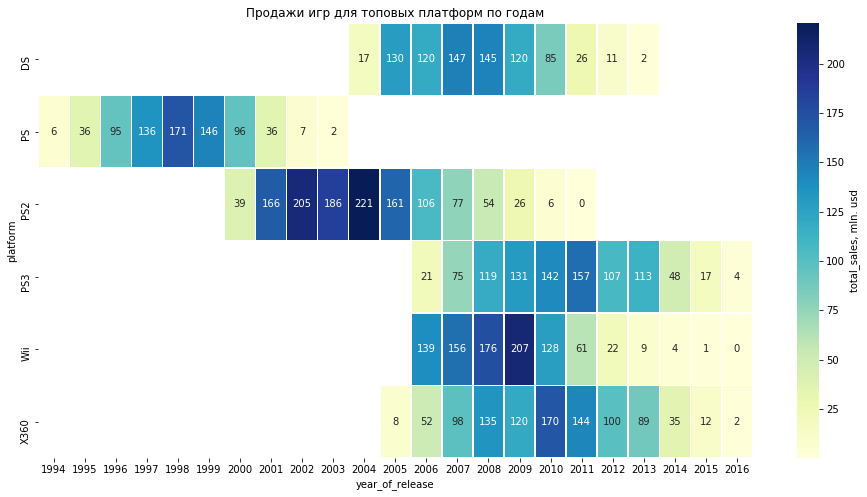

In [22]:
# Исправим year_of_release для Strongest Tokyo University Shogi
games_data.loc[15957, 'year_of_release'] = 2007

# Пересоздадим sales_by_platform_and_year и pivot таблицу
sales_by_platform_and_year = games_data.groupby(['platform', 'year_of_release'], as_index=False)\
.agg({'total_sales': 'sum'})
top_platforms_pivot = sales_by_platform_and_year.query('platform in @top_platforms')\
    .pivot("platform", "year_of_release", "total_sales")

# Построим заново heatmap
heatmap_platform_sales_by_year(top_platforms_pivot, title = 'Продажи игр для топовых платформ по годам')

Как видно из графика, в среднем, полный жизненный цикл популярной платформы составляет около 10 лет. При этом наибольшие продажи игр платформа показывает в среднем на протяжении 4х лет. Примерно раз в 6 лет производители обновляют платформу. На графике это хорошо видно на примере платформ Sony play station (PS, PS2, PS3).  

Зная закономерности жизненного цикла наиболее популярных платформ, изучим heatmap для всех современных платформ (за последние 10 лет).

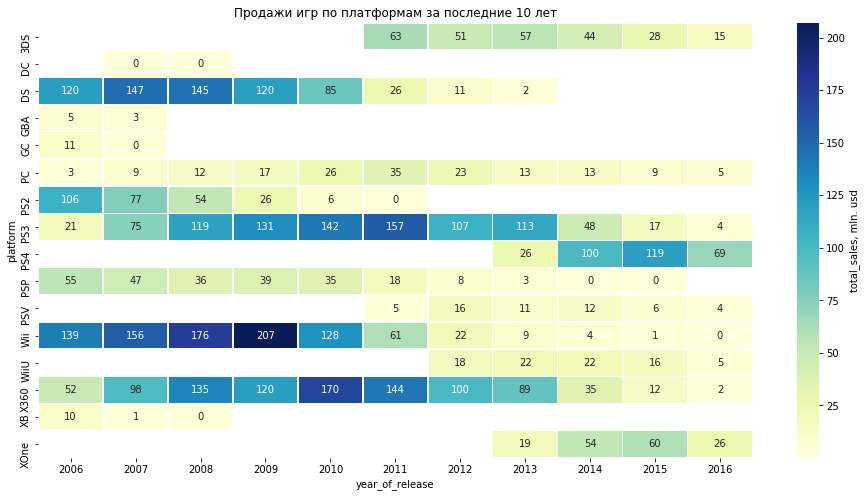

In [23]:
# Построим heatmap для всех современных платформ
platforms_in_last_10_years_pivot = sales_by_platform_and_year.query('year_of_release >= 2006')\
.pivot("platform", "year_of_release", "total_sales")
heatmap_platform_sales_by_year(platforms_in_last_10_years_pivot, \
                               title = 'Продажи игр по платформам за последние 10 лет')


### Вывод

Как видно из графика, для 2016 года характерны следующие особенности:
- закончился жизненных цикл 7го поколения крупных платформ: PS3 от Sony, X360 от Microsoft, Wii от Nintendo;
- платформы 8го поколения (PS4 от Sony, XOne от Microsoft, WiiU от Nintendo) уже прошли пик продаж игр.  

В прошлый раз похожая ситуация на рынке видеоигр была в 2012 году (6е поколение консолей уже закончило жизненный цикл, а 7е уже прошло пик продаж).  

Соответственно, с точки зрения платформ, при составлении прогноза на 2017 год, в качестве близкого по тенденциям целесообразно рассматривать 2013 год.

### Выбор актуального периода

С учетом анализа, проведенного в предыдущих двух пунктах, актуальным периодом для составления прогноза на 2017 год является 2013 - 2016 годы.

In [24]:
# Создадим датафрейм c данными за актуальный период
actual_games_data = games_data.query('year_of_release >=2013')

### Определение потенциально выгодных платформ

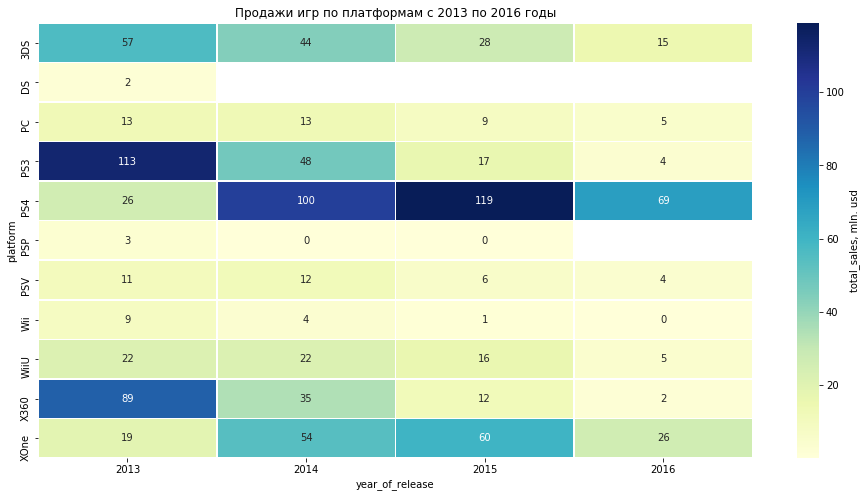

In [25]:
# Сгруппируем суммарные продажи за актуальный период по платформе и году
platform_by_actual_year_pivot = actual_games_data.groupby(['platform', 'year_of_release'], as_index=False)\
.agg({'total_sales': 'sum'}).pivot("platform", "year_of_release", "total_sales")

heatmap_platform_sales_by_year(platform_by_actual_year_pivot, \
                               title = 'Продажи игр по платформам с 2013 по 2016 годы')


### Вывод:

Учитывая тенденции, видимые на графике, и предполагая, что 2017 год в части платформ будет похож на 2013, можно спрогнозировать следующее:
- Продажи по всем имеющимся платформам будут и дальше падать;
- Окончательно перестанут продаваться игры на платформах 7го поколения (PS3 от Sony, X360 от Microsoft, Wii от Nintendo);
- Продажи игр на консолях Nintendo (3DS и WiiU) будут крайне малы;
- С учетом того, что и 3DS и WiiU находятся на стадии завершения своего жизненного цикла, а продажи игр для них стремятся к нулю, в 2017 году возможен выход новой консоли от Nintendo;
- Основные продажи, как и в 2016 году, придутся на PS4 (Sony) и XOne (Microsoft). Данные платформы можно считать потенциально наиболее выгодными в 2017 году.

### Анализ глобальных продаж каждой игры с разбивкой по потенциально выгодным  платформам

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


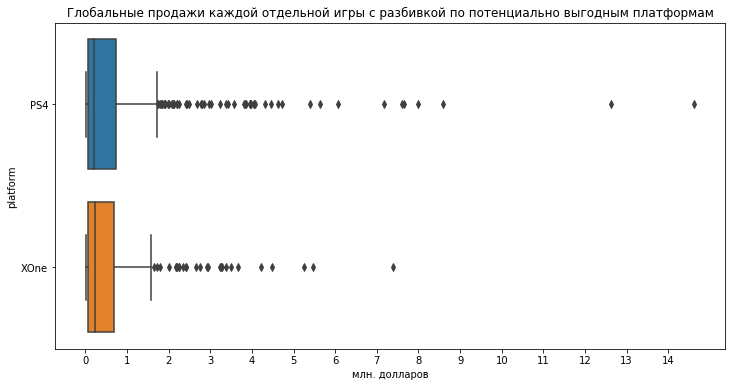

In [34]:
beneficial_platforms = ['PS4', 'XOne']
# Создадим датафрейм, содержащий только PS4 и XOne
ps4_and_xone_data =  actual_games_data.query('platform in @beneficial_platforms')
display(ps4_and_xone_data.head())

# Построим boxplot для продаж отдельных игр на каждой из потенциально выгодных платформ
fig = plt.figure(figsize = (12, 6))
ax = sns.boxplot(x=ps4_and_xone_data["total_sales"], y = ps4_and_xone_data['platform'])
plt.xticks(np.arange(0, 15, step=1))
plt.title("Глобальные продажи каждой отдельной игры с разбивкой по потенциально выгодным платформам")
plt.xlabel("млн. долларов")
plt.show()

### Вывод:

Из графика распределения видно, что для большинства игр глобальные продажи у PS4 и XOne практически равны. Однако, на PS4 за исследуемый период было больше отдельных игр с очень большими продажами (в том числе более 12 и 14 миллионов долларов).

### Анализ влияния отзывов на продажи

Проанализируем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве платформы для анализа выберем PS4.

user_score
PS4: коэффициент корреляции между user_score и продажами игры составляет -0.03
PS3: коэффициент корреляции между user_score и продажами игры составляет 0.01
XOne: коэффициент корреляции между user_score и продажами игры составляет -0.08
3DS: коэффициент корреляции между user_score и продажами игры составляет 0.29
X360: коэффициент корреляции между user_score и продажами игры составляет -0.01
WiiU: коэффициент корреляции между user_score и продажами игры составляет 0.42

critic_score
PS4: коэффициент корреляции между critic_score и продажами игры составляет 0.40
PS3: коэффициент корреляции между critic_score и продажами игры составляет 0.29
XOne: коэффициент корреляции между critic_score и продажами игры составляет 0.41
3DS: коэффициент корреляции между critic_score и продажами игры составляет 0.34
X360: коэффициент корреляции между critic_score и продажами игры составляет 0.30
WiiU: коэффициент корреляции между critic_score и продажами игры составляет 0.39



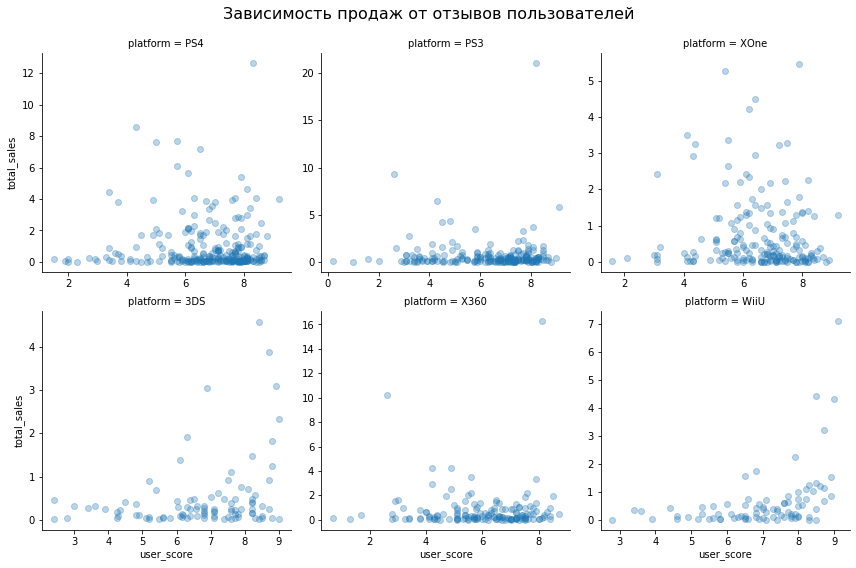

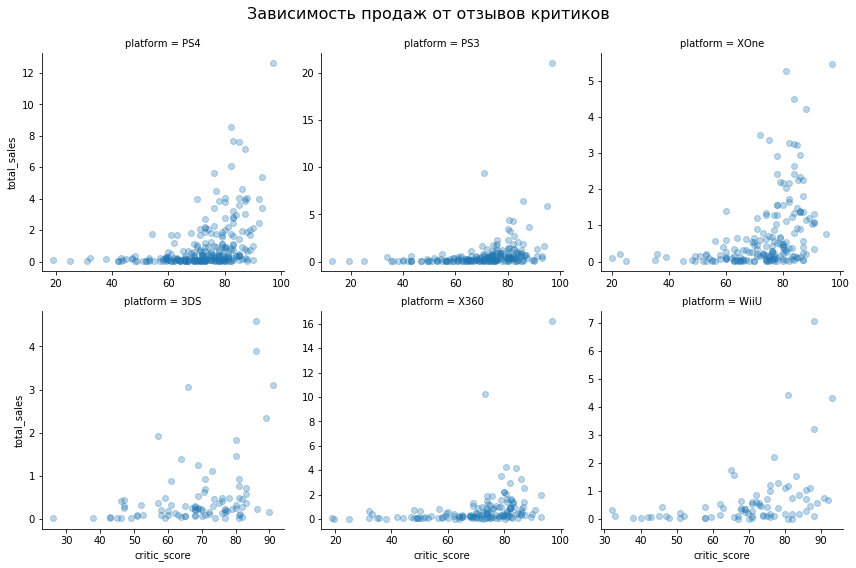

In [27]:
# Выбероем 6 наиболее популярных платформ за актуальный период
top6_actual_platforms = actual_games_data.groupby('platform').agg({"total_sales": "sum"}).\
sort_values(by='total_sales', ascending=False).head(6).index

def sales_to_score_plots_and_coreletion(which_score, title):
    '''
    Функция для расчета корреляции и построения графиков зависимости между оценками игры и ее продажами
    '''
    g = sns.FacetGrid(actual_games_data.query('platform in @top6_actual_platforms'), \
                      col="platform", col_wrap=3, sharex=False, sharey=False, height=4, \
                      col_order=top6_actual_platforms)
    g.fig.suptitle(title, size=16)
    g.map(plt.scatter, which_score, 'total_sales', alpha=0.3)
    g.fig.subplots_adjust(top=.9)
    
    # Посчитаем корреляцию (Коэффициент Пирсона) между оценками игры и продажами
    print('===========')
    print(which_score)
    print('===========')
    for platform in top6_actual_platforms:
        platform_data = actual_games_data.query('platform == @platform')
        print(platform + ': коэффициент корреляции между {} и продажами игры составляет {:.2f}'\
              .format(which_score, platform_data[which_score].corr(platform_data['total_sales'])))
    print()
    
sales_to_score_plots_and_coreletion('user_score', 'Зависимость продаж от отзывов пользователей')
sales_to_score_plots_and_coreletion('critic_score', 'Зависимость продаж от отзывов критиков')


### Вывод

Для игр всех популярных платформ присутствует слабая положительная корреляция между продажами игры и отзывами критиков. Таким образом, положительные отзывы критиков влияют на успешность продаж игры. Однако данное влияние не очень сильное.  
В то же время, корреляция между продажами игр и отзывами пользователей наблюдается только для платформ Nintendo (3DS и WiiU), для которых положительные отзывы критиков влияют на успешность продаж игры. По-видимому это связано со спецификой региона "Япония" или с более активным игровым коммьюнити пользователей Nintendo.

### Анализ распределения игр по жанрам

genre
Action          322.22
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


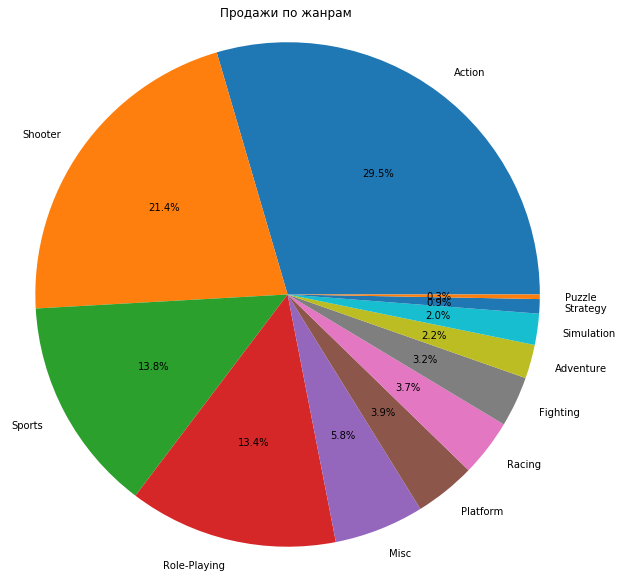

In [28]:
# Сгруппируем игры за актуальный период по жанрам и построим круговую диаграмму
actual_games_by_genre = actual_games_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(actual_games_by_genre)

# Построим круговую диаграмму для распределения продаж по жанрам
plt.figure(figsize = (10, 10))
plt.pie(actual_games_by_genre, labels=actual_games_by_genre.index, autopct='%1.1f%%')
plt.title('Продажи по жанрам')
plt.axis('equal')
plt.show()


### Вывод

Более половины продаж игр приходится на жанры "Action" и "Shooter" (29.5% и 21.4% соответственно). Еще четверть продаж приходится на игры жанра "Sports" (13.8%) и "Role-Playing" (13.4%). Остальные жанры, среди которых "Platform", "Racing", "Fighting", "Advdnture", "Simulation", "Strategy", "Puzzle", а также жанры, не вошедшие ни в один из вышеуказанных ("Misc") занимают суммарно 22% от общих продаж.

## Шаг 3. Составление портрета типичного пользователя для каждого региона

Для каждого региона (Северная Америка, Европа, Япония) определим:
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Продажи в зависимости от рейтинга ESRB.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


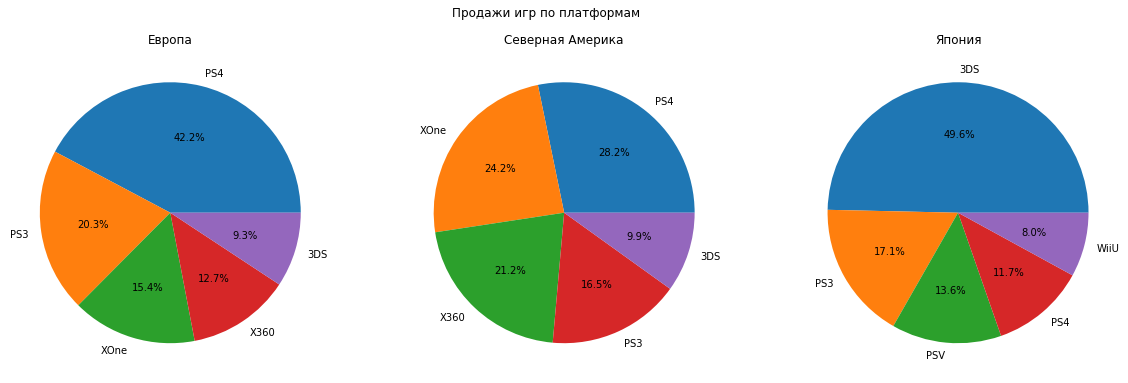

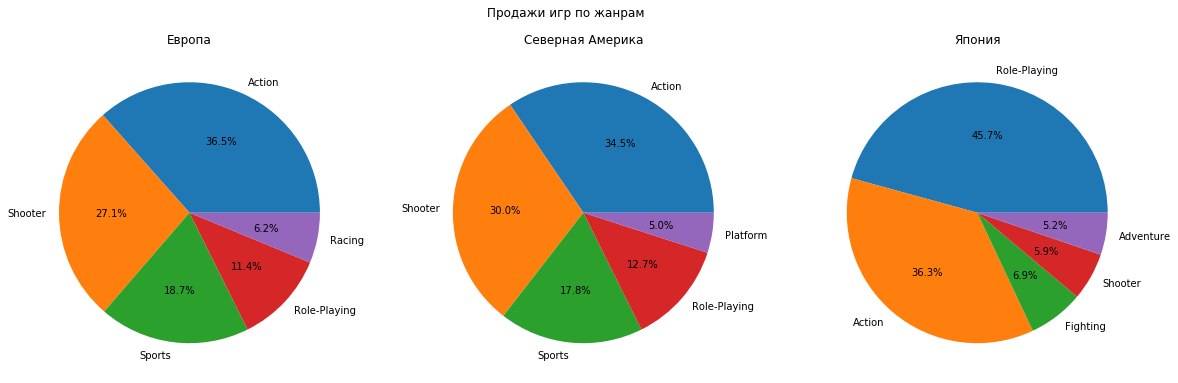

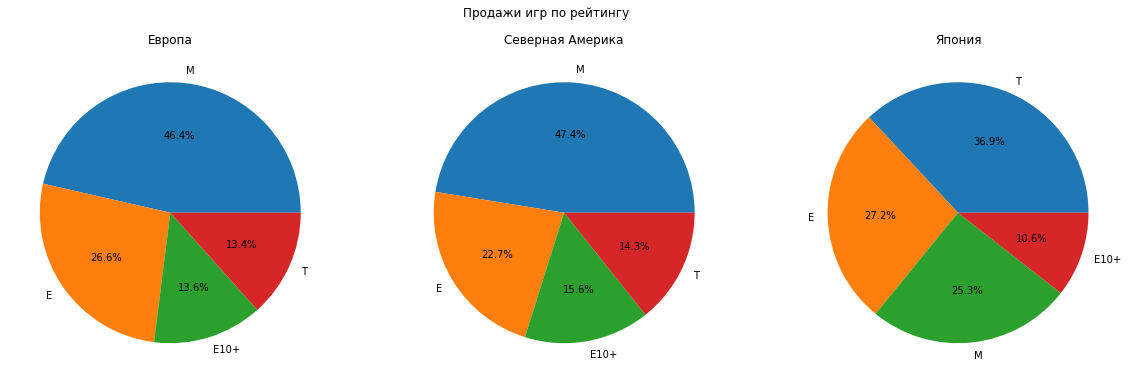

In [29]:
# Создадим список регионов
regions = [['eu_sales', 'Европа'], ['na_sales', 'Северная Америка'], ['jp_sales', 'Япония']]

# Посчитаем суммарные продажи для каждого региона по платформам
region_sales_by_platform = actual_games_data.groupby('platform')['eu_sales', 'na_sales', 'jp_sales'].sum()

# Посчитаем суммарные продажи для каждого региона по жанрам.
# При этом исключим игры, где жанр отмечен как Misc (разное), так как это сборная группа жанров, 
# не вошедших в более популярные жанры
region_sales_by_genre = actual_games_data.query('genre != "Misc"')\
.groupby('genre')['eu_sales', 'na_sales', 'jp_sales'].sum()

# Посчитаем суммарные продажи для каждого региона по рейтингу
region_sales_by_rating = actual_games_data.groupby('rating')['eu_sales', 'na_sales', 'jp_sales'].sum()

def display_piechart_by_region(df, title):
    """
    Функция для построения круговых диаграмм продаж игр для каждого региона
    """
    fig, ax = plt.subplots(ncols=3, figsize=(20,6))
    fig.suptitle(title)
    region_pos = 0
    for col in ax:
        region_top5 = df[regions[region_pos][0]].sort_values(ascending = False).head(5)
        col.pie(region_top5, labels=region_top5.index, autopct='%1.1f%%')
        col.set(title=regions[region_pos][1])
        region_pos+=1
    plt.show()
    
# Построим круговые диаграммы продаж игр по самым популярным платформам для каждого региона
display_piechart_by_region(df=region_sales_by_platform, title='Продажи игр по платформам')
print()

# Построим круговые диаграммы продаж игр по самым популярным жанрам для каждого региона
display_piechart_by_region(region_sales_by_genre, title='Продажи игр по жанрам')
print()

# Построим круговые диаграммы продаж игр по рейтингу для каждого региона
display_piechart_by_region(region_sales_by_rating, title='Продажи игр по рейтингу')


## Вывод

Предпочтения пользователей в значительной мере зависят от региона. При этом регионы "Европа" и "Северная Америка" достаточно похожи между собой, в то время как регион "Япония" сильно от них отличается. Рассмотрим различия более подробно.  
**Наиболее популярные платформы:**  
Самой популярной платформой в рассматриваемый период для регионов "Европа" и "Северная Америка" является PS4. Однако в Северной Америке PS4 практически поровну делит продажи игр с другой консолью 8го поколения - XOne (28.2% продаж игр приходится на PS4 и 24.2% на XOne). В Европе позиции PS4 намного сильнее, чем XOne: 42.2% и 15.4% соответствененно.  
В регионе "Япония" половина всех продаж игр приходится на портативную консоль 3DS от Nintendo. Также данный регион отличает тот факт, что в топ 5 платформ входит PSV (13.6%). Таким образом, в Японии пользователи предпочитают портативные консоли стационарным.  
**Продажи по жанрам:**  
Распределение продаж игр по жанрам практически совпадает для регионов "Европа" и "Северная Америка". Первые 2 места в этих регионах делят жанры Action и Shooter, на их долю приходится более 70% проданных игр.  В Японии более 45% продаж приходится на Role-Playing игры, на 2м месте находится Action (36.3%), а на 3м Fighting (6,9%), который вообще отсутствует в топ5 жанров для Северной Америки и Европы. Продажи игр жанра Shooter в Японии составляют всего 5.9%.  
**Продажи по рейтингу:**
В связи с различиями предпочтений по жанрам, в регионе "Япония" существуют существенные различия в рейтинге наиболее продаваемых игр. Так в Японии большинство продаваемых игр имеет рейтинг "Т" (Игра подходит для лиц от 13 лет и старше), в то время, как в Северной Америке и Европе рейтинг "М" (Материалы игры не подходят для подростков младше 17 лет).

## Шаг 5. Проверка гипотез

В данном разделе будут проверены следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

### Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". 
1. Сделаем выборку игр, для которых известно значение 'user_score';
2. Сформулируем нулевую гипотезу о равенстве средних двух генеральных совокупностей.
Нулевая гипотеза в данном случае не будет отличаться от поставленного вопроса: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются
3. Уровень значимости примем за 5%.
4. Поскольку перед нами стоит задача проверки гипотезы о равенстве средних значений в двух выборках, то применим t-критерий Стьюдента.

In [30]:
# Из данных за актуальный период сделаем выборку, где присутствует значение 'user_score'
sample_with_user_score = actual_games_data.dropna(subset = ['user_score'])

# Критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

results = st.ttest_ind(
    sample_with_user_score.query('platform == "XOne"')['user_score'], 
    sample_with_user_score.query('platform == "PC"')['user_score'])

print('p-значение: {:.1%}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 10.0%
Не получилось отвергнуть нулевую гипотезу


### Вывод:
Поскольку фактический уровень значимости получился больше принятого критического значения 5%, мы не можем отвергнуть нулевую гипотезу. Таким образом, в данных за исследуемый период достоверных различий между средними пользовательским рейтингами на платформах Xbox One и PC не выявлено.

### Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные".  
1. Используем выборку игр, для которых известно значение 'user_score';
2. Сформулируем нулевую гипотезу о равенстве средних двух генеральных совокупностей.  
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются
3. Уровень значимости примем за 5%.
4. Поскольку перед нами стоит задача проверки гипотезы о равенстве средних значений в двух выборках (нулевая гипотеза), то применим t-критерий Стьюдента.

In [31]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

results = st.ttest_ind(
    sample_with_user_score.query('genre == "Action"')['user_score'], 
    sample_with_user_score.query('genre == "Sports"')['user_score'])

print('p-значение: {:.1%}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0%
Отвергаем нулевую гипотезу


### Вывод:
Поскольку фактический уровень значимости получился меньше принятого критического значения 5%, нулевая гипотеза отвергается. Это говорит о том, что в генеральной совокупности компьютерных игр средние пользовательские рейтинги жанров Action и Sports различаются с высокой степенью достоверности.

## Шаг 6. Общий вывод

По окончании исследования можно сделать следующие выводы.  
Рынок компьютерных игр переживает период спада, который начался еще в 2008 году. Скорее всего это связано с развитием рынка игр для смартфонов и с последствиями экономического кризиса 2008 года.  
Основываясь на выбранном периоде с 2013 по 2016 годы, можно спрогнозировать, что в 2016 году продажи игр на всех основных платформах будут продолжать падать. Основные продажи игр придутся на платформы 8го поколения, в первую очередь на PS4 (Sony) и XOne (Microsoft). Продажи игр для консолей Nintendo будут высокими лишь в регионе "Япония". Учитывая, что 3DS и WiiU находятся на стадии завершения своего жизненного цикла, в 2017 году возможен выход новой консоли от Nintendo, которая также будет пользоваться популярностью преимущественно в регионе "Япония".  
Наиболее перспективными жанрами, согласно прогнозу, по-прежнему будут Action и Shooter, так как игры данных жанров наиболее популярны в регионах "Северная Америка" и "Европа". Игры жанров "Sports" и "Role-Playing" также будут популярны, однако стоит учесть, что основным рынком продаж жанра "Role-Playing" будет регион "Япония".  
В ходе исследования было установленно, что пользовательские рейтинги игр для различных платформ не имеют достоверных различий. В тоже время, имеются различия между пользовательскими рейтингами для разных жанров.  
Вместе с тем, исследование установило, что положительные отзывы пользователей влияют на успешность продаж игры только для платформ Nintendo (3DS и WiiU). По-видимому это связано со спецификой региона "Япония". В тоже время, небольшая положительная корреляция между продажами игры и отзывами критиков присутствует для игр всех популярных платформ.  

Полученные выводы можно использовать для планирования кампании по продаже игр на 2017-й год.